In [144]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import pandas as pd
import time

geolocator = Nominatim(user_agent="Noida_explorer")
columns_name=['Sector', 'Lat', 'Long']
noida_df=pd.DataFrame(columns=columns_name)
with open('noida-sector.txt') as sectors:
    for sector in sectors:
        sector_address=sector.strip('\n')+", Noida, Uttar Pradesh, India"
        location = geolocator.geocode(sector_address)
        latitude = location.latitude
        longitude = location.longitude
        print('The geograpical coordinate of {} is {}, {}.'.format(sector_address,latitude, longitude))
        noida_df=noida_df.append({'Sector': sector.strip('\n'),'Lat': latitude,'Long':longitude},ignore_index=True)
        time.sleep(1)
        

The geograpical coordinate of Sector 1, Noida, Uttar Pradesh, India is 28.590229049999998, 77.3124577435579.
The geograpical coordinate of Sector 2, Noida, Uttar Pradesh, India is 28.5850799, 77.31526236234811.
The geograpical coordinate of Sector 3, Noida, Uttar Pradesh, India is 28.5805677, 77.31886980069564.
The geograpical coordinate of Sector 4, Noida, Uttar Pradesh, India is 28.5836826, 77.32296576702811.
The geograpical coordinate of Sector 5, Noida, Uttar Pradesh, India is 28.5887898, 77.32114561912512.
The geograpical coordinate of Sector 6, Noida, Uttar Pradesh, India is 28.59297695, 77.31869383436373.
The geograpical coordinate of Sector 7, Noida, Uttar Pradesh, India is 28.5726442, 77.3547609.
The geograpical coordinate of Sector 8, Noida, Uttar Pradesh, India is 28.5726442, 77.3547609.
The geograpical coordinate of Sector 9, Noida, Uttar Pradesh, India is 28.5868527, 77.32739260029359.
The geograpical coordinate of Sector 10, Noida, Uttar Pradesh, India is 28.5726442, 77.3

The geograpical coordinate of Sector 80, Noida, Uttar Pradesh, India is 28.58379155, 77.30319265337253.
The geograpical coordinate of Sector 81, Noida, Uttar Pradesh, India is 28.5868527, 77.32739260029359.
The geograpical coordinate of Sector 82, Noida, Uttar Pradesh, India is 28.531154100000002, 77.3899335641002.
The geograpical coordinate of Sector 83, Noida, Uttar Pradesh, India is 28.52515145, 77.39860841102819.
The geograpical coordinate of Sector 84, Noida, Uttar Pradesh, India is 28.4530401, 77.5473763462683.
The geograpical coordinate of Sector 85, Noida, Uttar Pradesh, India is 28.5180798, 77.40448946289212.
The geograpical coordinate of Sector 86, Noida, Uttar Pradesh, India is 28.58379155, 77.30319265337253.
The geograpical coordinate of Sector 87, Noida, Uttar Pradesh, India is 28.5868527, 77.32739260029359.
The geograpical coordinate of Sector 88, Noida, Uttar Pradesh, India is 28.52929225, 77.42414466834524.
The geograpical coordinate of Sector 89, Noida, Uttar Pradesh, 

The geograpical coordinate of Sector 159, Noida, Uttar Pradesh, India is 28.5868527, 77.32739260029359.
The geograpical coordinate of Sector 160, Noida, Uttar Pradesh, India is 28.5051604, 77.37145640390182.
The geograpical coordinate of Sector 161, Noida, Uttar Pradesh, India is 28.5868527, 77.32739260029359.
The geograpical coordinate of Sector 162, Noida, Uttar Pradesh, India is 28.5868527, 77.32739260029359.
The geograpical coordinate of Sector 163, Noida, Uttar Pradesh, India is 28.4758348, 77.55447875076581.


In [145]:
noida_df

,Sector,Lat,Long
0,Sector 1,28.590229,77.312458
1,Sector 2,28.585080,77.315262
2,Sector 3,28.580568,77.318870
3,Sector 4,28.583683,77.322966
4,Sector 5,28.588790,77.321146
...,...,...,...
158,Sector 159,28.586853,77.327393
159,Sector 160,28.505160,77.371456
160,Sector 161,28.586853,77.327393
161,Sector 162,28.586853,77.327393


In [146]:
noida_df.to_csv('noida_sector_lat_long.csv')

In [147]:
import json # library to handle JSON files
import folium # map rendering library

address = 'Noida, Uttar Pradesh, India'

location = geolocator.geocode(address)
latitude_noida = location.latitude
longitude_noida = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude_noida, longitude_noida))

#Building the map of Noida

map_noida = folium.Map(location=[latitude_noida, longitude_noida], zoom_start=10)

#add markers to map

for lat, longt, sector in zip(noida_df['Lat'], noida_df['Long'],noida_df['Sector']):
    label='{}'.format(sector)
    label=folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,longt],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_noida)

The geograpical coordinate of Toronto are 28.5726442, 77.3547609.


In [148]:
map_noida

In [149]:
#Foursquare API creds

CLIENT_ID = 'IQH1J15CNQSOJKN3O5HLI4LJRB5FI0O5RT25KY1ZUTYVU5QJ' # your Foursquare ID
CLIENT_SECRET = '205R54E5GVBLIGY00G5DNY3C25FOXEWYMMINMRD0IXJGPQJT' # your Foursquare Secret
VERSION = '20200605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IQH1J15CNQSOJKN3O5HLI4LJRB5FI0O5RT25KY1ZUTYVU5QJ
CLIENT_SECRET:205R54E5GVBLIGY00G5DNY3C25FOXEWYMMINMRD0IXJGPQJT


In [150]:
import requests
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    radius=500
    LIMIT=100
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        time.sleep(0.5)  
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Sector', 
                  'Sector Latitude', 
                  'Sector Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [151]:
noida_venues=getNearbyVenues(names=noida_df['Sector'],
                                   latitudes=noida_df['Lat'],
                                   longitudes=noida_df['Long']
                                  )

Sector 1
Sector 2
Sector 3
Sector 4
Sector 5
Sector 6
Sector 7
Sector 8
Sector 9
Sector 10
Sector 11
Sector 12
Sector 13
Sector 14
Sector 15
Sector 16
Sector 17
Sector 18
Sector 19
Sector 20
Sector 21
Sector 22
Sector 23
Sector 24
Sector 25
Sector 26
Sector 27
Sector 28
Sector 29
Sector 30
Sector 31
Sector 32
Sector 33
Sector 34
Sector 35
Sector 36
Sector 37
Sector 38
Sector 39
Sector 40
Sector 41
Sector 42
Sector 43
Sector 44
Sector 45
Sector 46
Sector 47
Sector 48
Sector 49
Sector 50
Sector 51
Sector 52
Sector 53
Sector 54
Sector 55
Sector 56
Sector 57
Sector 58
Sector 59
Sector 60
Sector 61
Sector 62
Sector 63
Sector 64
Sector 65
Sector 66
Sector 67
Sector 68
Sector 69
Sector 70
Sector 71
Sector 72
Sector 73
Sector 74
Sector 75
Sector 76
Sector 77
Sector 78
Sector 79
Sector 80
Sector 81
Sector 82
Sector 83
Sector 84
Sector 85
Sector 86
Sector 87
Sector 88
Sector 89
Sector 90
Sector 91
Sector 92
Sector 93
Sector 94
Sector 95
Sector 96
Sector 97
Sector 98
Sector 99
Sector 100
Sector 1

In [152]:
print(noida_venues.shape)
noida_venues.head()

(582, 7)


,Sector,Sector Latitude,Sector Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Sector 1,28.590229,77.312458,Cafe Coffee Day,28.591626,77.308197,Coffee Shop
1,Sector 1,28.590229,77.312458,Nirulas Hotel,28.586437,77.313750,Hotel
2,Sector 1,28.590229,77.312458,Axis Bank ATM,28.593310,77.308980,ATM
3,Sector 2,28.585080,77.315262,Nirula's Ice-Cream,28.583401,77.314420,Indian Restaurant
4,Sector 2,28.585080,77.315262,Fresh Food Factory - Accha Khao Accha Khilao,28.580971,77.317292,Indian Restaurant


In [153]:
noida_venues.groupby('Sector').count()

,Sector Latitude,Sector Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Sector,,,,,,
Sector 1,3,3,3,3,3,3
Sector 10,7,7,7,7,7,7
Sector 100,7,7,7,7,7,7
Sector 101,5,5,5,5,5,5
Sector 102,2,2,2,2,2,2
...,...,...,...,...,...,...
Sector 91,2,2,2,2,2,2
Sector 93,3,3,3,3,3,3
Sector 94,2,2,2,2,2,2


In [154]:
print('There are '+str(len(noida_venues['Venue Category'].unique()))+ ' unique categories')

There are 81 unique categories


In [155]:
noida_onehot=pd.get_dummies(noida_venues['Venue Category'],prefix="", prefix_sep="")
noida_onehot['Sector'] = noida_venues['Sector'] 
fixed_columns = [noida_onehot.columns[-1]] + list(noida_onehot.columns[:-1])
noida_onehot = noida_onehot[fixed_columns]

noida_onehot.head()

,Sector,ATM,Arcade,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Bed & Breakfast,Breakfast Spot,...,Shopping Plaza,Snack Place,South Indian Restaurant,Spa,Stadium,Tea Room,Train Station,Vegetarian / Vegan Restaurant,Wine Bar,Women's Store
0,Sector 1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Sector 1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Sector 1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Sector 2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Sector 2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
noida_onehot.shape

(582, 82)

In [157]:
noida_grouped=noida_onehot.groupby('Sector').mean().reset_index()
noida_grouped

,Sector,ATM,Arcade,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Bed & Breakfast,Breakfast Spot,...,Shopping Plaza,Snack Place,South Indian Restaurant,Spa,Stadium,Tea Room,Train Station,Vegetarian / Vegan Restaurant,Wine Bar,Women's Store
0,Sector 1,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Sector 10,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Sector 100,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Sector 101,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Sector 102,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Sector 91,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
134,Sector 93,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
135,Sector 94,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
136,Sector 96,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [158]:
top_venue_limit=5

for area in noida_grouped['Sector']:
    print("-----"+area+"-----")
    temp=noida_grouped[noida_grouped['Sector']==area].T.reset_index() #Get area data
    temp.columns=['venue','freq'] # rename columns
    temp=temp.iloc[1:] #Remove the first row as its displayes area name
    temp['freq']=temp['freq'].astype(float) # chnage freq to float for sorting
    temp=temp.round({'freq':2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(top_venue_limit))

-----Sector 1-----
                  venue  freq
0                   ATM  0.33
1                 Hotel  0.33
2           Coffee Shop  0.33
3                Lounge  0.00
4  Other Great Outdoors  0.00
-----Sector 10-----
           venue  freq
0      Multiplex  0.29
1  Shopping Mall  0.14
2  Movie Theater  0.14
3  Metro Station  0.14
4     Food Truck  0.14
-----Sector 100-----
           venue  freq
0      Multiplex  0.29
1  Shopping Mall  0.14
2  Movie Theater  0.14
3  Metro Station  0.14
4     Food Truck  0.14
-----Sector 101-----
               venue  freq
0  Indian Restaurant   0.4
1   Department Store   0.2
2              Hotel   0.2
3               Farm   0.2
4             Market   0.0
-----Sector 102-----
                     venue  freq
0                    Plaza   0.5
1               Food Truck   0.5
2                      ATM   0.0
3             Liquor Store   0.0
4  North Indian Restaurant   0.0
-----Sector 103-----
                     venue  freq
0                    Plaza  

4          Hookah Bar   0.2
-----Sector 144-----
                venue  freq
0                 ATM   0.2
1                 Bar   0.2
2  Chinese Restaurant   0.2
3      Sandwich Place   0.2
4          Hookah Bar   0.2
-----Sector 145-----
                venue  freq
0                 ATM   0.2
1                 Bar   0.2
2  Chinese Restaurant   0.2
3      Sandwich Place   0.2
4          Hookah Bar   0.2
-----Sector 146-----
                venue  freq
0                 ATM   0.2
1                 Bar   0.2
2  Chinese Restaurant   0.2
3      Sandwich Place   0.2
4          Hookah Bar   0.2
-----Sector 147-----
                venue  freq
0                 ATM   0.2
1                 Bar   0.2
2  Chinese Restaurant   0.2
3      Sandwich Place   0.2
4          Hookah Bar   0.2
-----Sector 148-----
                     venue  freq
0                 Pharmacy   0.5
1                 Wine Bar   0.5
2             Liquor Store   0.0
3  North Indian Restaurant   0.0
4              Music Store   0

                  venue  freq
0                   ATM  0.25
1                  Café  0.25
2           IT Services  0.25
3     Indian Restaurant  0.25
4  Other Great Outdoors  0.00
-----Sector 50-----
                     venue  freq
0                   Garden   1.0
1                      ATM   0.0
2             Liquor Store   0.0
3  North Indian Restaurant   0.0
4              Music Store   0.0
-----Sector 51-----
                venue  freq
0       Grocery Store  0.33
1  Italian Restaurant  0.33
2   Electronics Store  0.33
3                 ATM  0.00
4              Lounge  0.00
-----Sector 52-----
                     venue  freq
0                      ATM  0.25
1            Shopping Mall  0.25
2              Pizza Place  0.25
3       Italian Restaurant  0.25
4  North Indian Restaurant  0.00
-----Sector 53-----
           venue  freq
0            ATM  0.25
1  Shopping Mall  0.25
2    Pizza Place  0.25
3     Food Truck  0.25
4    Music Store  0.00
-----Sector 54-----
           venue  

4  Other Great Outdoors   0.0


In [159]:
def return_top_venues(row,limit):
    row_venues=row.iloc[1:]
    row_venues_sorted=row_venues.sort_values(ascending=False)
    return row_venues_sorted.index[0:limit]

In [160]:
import numpy as np
venue_limit=5
columns=['Sector']

for k in np.arange(venue_limit):
    if(k==0):
        columns.append('1st most commonn venue')
        continue
    if(k==1):
        columns.append('2nd most commonn venue')
        continue
    if(k==2):
        columns.append('3rd most commonn venue')
        continue
    if(k>2):
        columns.append('{}th most common venue'.format(k+1))

noida_sorted=pd.DataFrame(columns=columns)
noida_sorted['Sector']=noida_grouped['Sector']

for j in np.arange(noida_grouped.shape[0]):
        
        noida_sorted.iloc[j,1:]=return_top_venues(noida_grouped.iloc[j,:],venue_limit)

noida_sorted

,Sector,1st most commonn venue,2nd most commonn venue,3rd most commonn venue,4th most common venue,5th most common venue
0,Sector 1,ATM,Coffee Shop,Hotel,Flea Market,Department Store
1,Sector 10,Multiplex,Movie Theater,Metro Station,Food Truck,Café
2,Sector 100,Multiplex,Movie Theater,Metro Station,Food Truck,Café
3,Sector 101,Indian Restaurant,Department Store,Hotel,Farm,Women's Store
4,Sector 102,Plaza,Food Truck,Women's Store,Fast Food Restaurant,Cosmetics Shop
...,...,...,...,...,...,...
133,Sector 91,Women's Store,Hotel,Flea Market,Department Store,Dessert Shop
134,Sector 93,Gym,Pizza Place,Grocery Store,Gift Shop,Garden
135,Sector 94,River,Other Great Outdoors,Women's Store,Farm,Convenience Store
136,Sector 96,Concert Hall,Golf Course,Fast Food Restaurant,Cosmetics Shop,Department Store


In [161]:
noida_sorted.shape

(138, 6)

In [162]:
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

noida_grouped_clustering = noida_grouped.drop('Sector', axis=1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(noida_grouped_clustering)

# check cluster labels generated for each row in the dataframe
print(kmeans.labels_[:])

[4 3 3 4 1 1 0 3 0 0 3 1 3 0 1 1 1 1 2 2 2 2 3 3 3 2 2 2 3 2 3 2 2 3 2 3 3
 2 2 3 0 2 2 2 2 2 0 2 4 2 2 2 2 2 2 0 2 4 2 2 0 3 3 4 4 3 3 3 4 3 3 3 4 3
 4 4 2 3 3 3 3 3 3 3 4 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 4 3 3 2 3 3 3 3
 4 3 3 1 3 3 0 3 0 1 1 3 1 2 3 2 1 2 3 1 2 3 4 3 3 3 3]


In [163]:
noida_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

noida_merged = noida_df

In [164]:
noida_merged = noida_merged.join(noida_sorted.set_index('Sector'), on='Sector')

In [165]:
noida_merged.head(200)

,Sector,Lat,Long,Cluster Labels,1st most commonn venue,2nd most commonn venue,3rd most commonn venue,4th most common venue,5th most common venue
0,Sector 1,28.590229,77.312458,4.0,ATM,Coffee Shop,Hotel,Flea Market,Department Store
1,Sector 2,28.585080,77.315262,4.0,Indian Restaurant,Hotel,Women's Store,Flea Market,Department Store
2,Sector 3,28.580568,77.318870,4.0,Indian Restaurant,Plaza,Coffee Shop,Train Station,Tea Room
3,Sector 4,28.583683,77.322966,4.0,Hookah Bar,Indian Restaurant,Women's Store,Flea Market,Department Store
4,Sector 5,28.588790,77.321146,3.0,ATM,IT Services,Indian Restaurant,Café,Fast Food Restaurant
...,...,...,...,...,...,...,...,...,...
158,Sector 159,28.586853,77.327393,2.0,ATM,Hookah Bar,Chinese Restaurant,Bar,Sandwich Place
159,Sector 160,28.505160,77.371456,NaN,NaN,NaN,NaN,NaN,NaN
160,Sector 161,28.586853,77.327393,2.0,ATM,Hookah Bar,Chinese Restaurant,Bar,Sandwich Place
161,Sector 162,28.586853,77.327393,2.0,ATM,Hookah Bar,Chinese Restaurant,Bar,Sandwich Place


In [166]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import math

# create map
map_clusters = folium.Map(location=[latitude_noida, longitude_noida], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map
markers_colors = []

for lat, lon, poi, cluster in zip(noida_merged['Lat'], noida_merged['Long'], noida_merged['Sector'], noida_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    print(cluster)
    colors='black' if math.isnan(cluster) else rainbow[int(cluster)-1]
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=colors,
        fill=True,
        fill_color=colors,
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#00b5eb', '#80ffb4', '#ffb360', '#ff0000']
4.0
4.0
4.0
4.0
3.0
2.0
3.0
3.0
2.0
3.0
3.0
3.0
3.0
3.0
4.0
4.0
3.0
3.0
4.0
3.0
3.0
3.0
4.0
3.0
3.0
3.0
4.0
3.0
4.0
2.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
4.0
3.0
3.0
3.0
3.0
3.0
3.0
nan
3.0
nan
3.0
3.0
3.0
3.0
3.0
3.0
3.0
4.0
3.0
4.0
3.0
3.0
3.0
3.0
3.0
3.0
4.0
nan
3.0
3.0
nan
1.0
nan
3.0
0.0
nan
3.0
0.0
nan
1.0
1.0
nan
1.0
2.0
3.0
2.0
nan
nan
1.0
2.0
3.0
1.0
3.0
4.0
nan
3.0
3.0
nan
3.0
3.0
nan
nan
3.0
4.0
1.0
1.0
0.0
3.0
0.0
0.0
3.0
1.0
0.0
1.0
nan
1.0
1.0
1.0
2.0
2.0
2.0
2.0
nan
nan
3.0
nan
3.0
2.0
2.0
2.0
3.0
2.0
2.0
2.0
3.0
nan
2.0
3.0
3.0
2.0
2.0
nan
0.0
2.0
nan
nan
2.0
2.0
2.0
2.0
0.0
2.0
2.0
nan
2.0
2.0
2.0
2.0
2.0
nan
0.0
2.0
nan
2.0
2.0
0.0


In [167]:
noida_merged.loc[noida_merged['Cluster Labels'] == 0.0]

,Sector,Lat,Long,Cluster Labels,1st most commonn venue,2nd most commonn venue,3rd most commonn venue,4th most common venue,5th most common venue
71,Sector 72,28.475835,77.554479,0.0,Wine Bar,Pharmacy,Fast Food Restaurant,Cosmetics Shop,Department Store
74,Sector 75,28.475835,77.554479,0.0,Wine Bar,Pharmacy,Fast Food Restaurant,Cosmetics Shop,Department Store
103,Sector 104,28.475835,77.554479,0.0,Wine Bar,Pharmacy,Fast Food Restaurant,Cosmetics Shop,Department Store
105,Sector 106,28.475835,77.554479,0.0,Wine Bar,Pharmacy,Fast Food Restaurant,Cosmetics Shop,Department Store
106,Sector 107,28.545932,77.376561,0.0,Pharmacy,Food Truck,Women's Store,Fast Food Restaurant,Cosmetics Shop
109,Sector 110,28.475835,77.554479,0.0,Wine Bar,Pharmacy,Fast Food Restaurant,Cosmetics Shop,Department Store
139,Sector 140,28.475835,77.554479,0.0,Wine Bar,Pharmacy,Fast Food Restaurant,Cosmetics Shop,Department Store
147,Sector 148,28.475835,77.554479,0.0,Wine Bar,Pharmacy,Fast Food Restaurant,Cosmetics Shop,Department Store
157,Sector 158,28.475835,77.554479,0.0,Wine Bar,Pharmacy,Fast Food Restaurant,Cosmetics Shop,Department Store
162,Sector 163,28.475835,77.554479,0.0,Wine Bar,Pharmacy,Fast Food Restaurant,Cosmetics Shop,Department Store


In [168]:
noida_merged.loc[noida_merged['Cluster Labels'] == 1.0]

,Sector,Lat,Long,Cluster Labels,1st most commonn venue,2nd most commonn venue,3rd most commonn venue,4th most common venue,5th most common venue
68,Sector 69,28.583792,77.303193,1.0,Plaza,Food Truck,Women's Store,Fast Food Restaurant,Cosmetics Shop
76,Sector 77,28.583792,77.303193,1.0,Plaza,Food Truck,Women's Store,Fast Food Restaurant,Cosmetics Shop
77,Sector 78,28.583792,77.303193,1.0,Plaza,Food Truck,Women's Store,Fast Food Restaurant,Cosmetics Shop
79,Sector 80,28.583792,77.303193,1.0,Plaza,Food Truck,Women's Store,Fast Food Restaurant,Cosmetics Shop
85,Sector 86,28.583792,77.303193,1.0,Plaza,Food Truck,Women's Store,Fast Food Restaurant,Cosmetics Shop
88,Sector 89,28.583792,77.303193,1.0,Plaza,Food Truck,Women's Store,Fast Food Restaurant,Cosmetics Shop
101,Sector 102,28.583792,77.303193,1.0,Plaza,Food Truck,Women's Store,Fast Food Restaurant,Cosmetics Shop
102,Sector 103,28.583792,77.303193,1.0,Plaza,Food Truck,Women's Store,Fast Food Restaurant,Cosmetics Shop
108,Sector 109,28.583792,77.303193,1.0,Plaza,Food Truck,Women's Store,Fast Food Restaurant,Cosmetics Shop
110,Sector 111,28.583792,77.303193,1.0,Plaza,Food Truck,Women's Store,Fast Food Restaurant,Cosmetics Shop


In [169]:
noida_merged.loc[noida_merged['Cluster Labels'] == 2.0]

,Sector,Lat,Long,Cluster Labels,1st most commonn venue,2nd most commonn venue,3rd most commonn venue,4th most common venue,5th most common venue
5,Sector 6,28.592977,77.318694,2.0,ATM,Bed & Breakfast,Flea Market,Department Store,Dessert Shop
8,Sector 9,28.586853,77.327393,2.0,ATM,Hookah Bar,Chinese Restaurant,Bar,Sandwich Place
29,Sector 30,28.573302,77.339173,2.0,Gym,Sandwich Place,Cosmetics Shop,Department Store,Dessert Shop
80,Sector 81,28.586853,77.327393,2.0,ATM,Hookah Bar,Chinese Restaurant,Bar,Sandwich Place
82,Sector 83,28.525151,77.398608,2.0,ATM,Comfort Food Restaurant,Convenience Store,Department Store,Dessert Shop
86,Sector 87,28.586853,77.327393,2.0,ATM,Hookah Bar,Chinese Restaurant,Bar,Sandwich Place
115,Sector 116,28.586853,77.327393,2.0,ATM,Hookah Bar,Chinese Restaurant,Bar,Sandwich Place
116,Sector 117,28.586853,77.327393,2.0,ATM,Hookah Bar,Chinese Restaurant,Bar,Sandwich Place
117,Sector 118,28.586853,77.327393,2.0,ATM,Hookah Bar,Chinese Restaurant,Bar,Sandwich Place
118,Sector 119,28.586853,77.327393,2.0,ATM,Hookah Bar,Chinese Restaurant,Bar,Sandwich Place


In [170]:
noida_merged.loc[noida_merged['Cluster Labels'] == 3.0]

,Sector,Lat,Long,Cluster Labels,1st most commonn venue,2nd most commonn venue,3rd most commonn venue,4th most common venue,5th most common venue
4,Sector 5,28.588790,77.321146,3.0,ATM,IT Services,Indian Restaurant,Café,Fast Food Restaurant
6,Sector 7,28.572644,77.354761,3.0,Multiplex,Movie Theater,Metro Station,Food Truck,Café
7,Sector 8,28.572644,77.354761,3.0,Multiplex,Movie Theater,Metro Station,Food Truck,Café
9,Sector 10,28.572644,77.354761,3.0,Multiplex,Movie Theater,Metro Station,Food Truck,Café
10,Sector 11,28.572644,77.354761,3.0,Multiplex,Movie Theater,Metro Station,Food Truck,Café
...,...,...,...,...,...,...,...,...,...
123,Sector 124,28.548304,77.327806,3.0,Café,Women's Store,Convenience Store,Department Store,Dessert Shop
127,Sector 128,28.572644,77.354761,3.0,Multiplex,Movie Theater,Metro Station,Food Truck,Café
131,Sector 132,28.511689,77.376770,3.0,Pizza Place,Construction & Landscaping,Women's Store,Fast Food Restaurant,Cosmetics Shop
134,Sector 135,28.498005,77.400033,3.0,Coffee Shop,Business Service,Hotel,Pizza Place,Fast Food Restaurant


In [171]:
noida_merged.loc[noida_merged['Cluster Labels'] == 4.0]

,Sector,Lat,Long,Cluster Labels,1st most commonn venue,2nd most commonn venue,3rd most commonn venue,4th most common venue,5th most common venue
0,Sector 1,28.590229,77.312458,4.0,ATM,Coffee Shop,Hotel,Flea Market,Department Store
1,Sector 2,28.585080,77.315262,4.0,Indian Restaurant,Hotel,Women's Store,Flea Market,Department Store
2,Sector 3,28.580568,77.318870,4.0,Indian Restaurant,Plaza,Coffee Shop,Train Station,Tea Room
3,Sector 4,28.583683,77.322966,4.0,Hookah Bar,Indian Restaurant,Women's Store,Flea Market,Department Store
14,Sector 15,28.582798,77.310222,4.0,Indian Restaurant,Metro Station,Restaurant,Women's Store,Fast Food Restaurant
15,Sector 16,28.657092,77.355491,4.0,Indian Restaurant,Department Store,Hotel,Farm,Women's Store
18,Sector 19,28.578397,77.324769,4.0,Indian Restaurant,Flea Market,Tea Room,Clothing Store,Pizza Place
22,Sector 23,28.592354,77.353813,4.0,Hotel,Food Truck,Women's Store,Flea Market,Department Store
26,Sector 27,28.574677,77.328728,4.0,Indian Restaurant,Pizza Place,Bakery,Hotel,Women's Store
28,Sector 29,28.570832,77.335821,4.0,Indian Restaurant,Gourmet Shop,South Indian Restaurant,Snack Place,Fast Food Restaurant


In [172]:
noida_merged.loc[noida_merged['Cluster Labels'] .isnull()]

,Sector,Lat,Long,Cluster Labels,1st most commonn venue,2nd most commonn venue,3rd most commonn venue,4th most common venue,5th most common venue
44,Sector 45,28.550602,77.350513,NaN,NaN,NaN,NaN,NaN,NaN
46,Sector 47,28.549828,77.370070,NaN,NaN,NaN,NaN,NaN,NaN
64,Sector 65,28.611299,77.385332,NaN,NaN,NaN,NaN,NaN,NaN
67,Sector 68,28.453040,77.547376,NaN,NaN,NaN,NaN,NaN,NaN
69,Sector 70,28.597638,77.384324,NaN,NaN,NaN,NaN,NaN,NaN
72,Sector 73,28.453040,77.547376,NaN,NaN,NaN,NaN,NaN,NaN
75,Sector 76,28.453040,77.547376,NaN,NaN,NaN,NaN,NaN,NaN
78,Sector 79,28.453040,77.547376,NaN,NaN,NaN,NaN,NaN,NaN
83,Sector 84,28.453040,77.547376,NaN,NaN,NaN,NaN,NaN,NaN
84,Sector 85,28.518080,77.404489,NaN,NaN,NaN,NaN,NaN,NaN


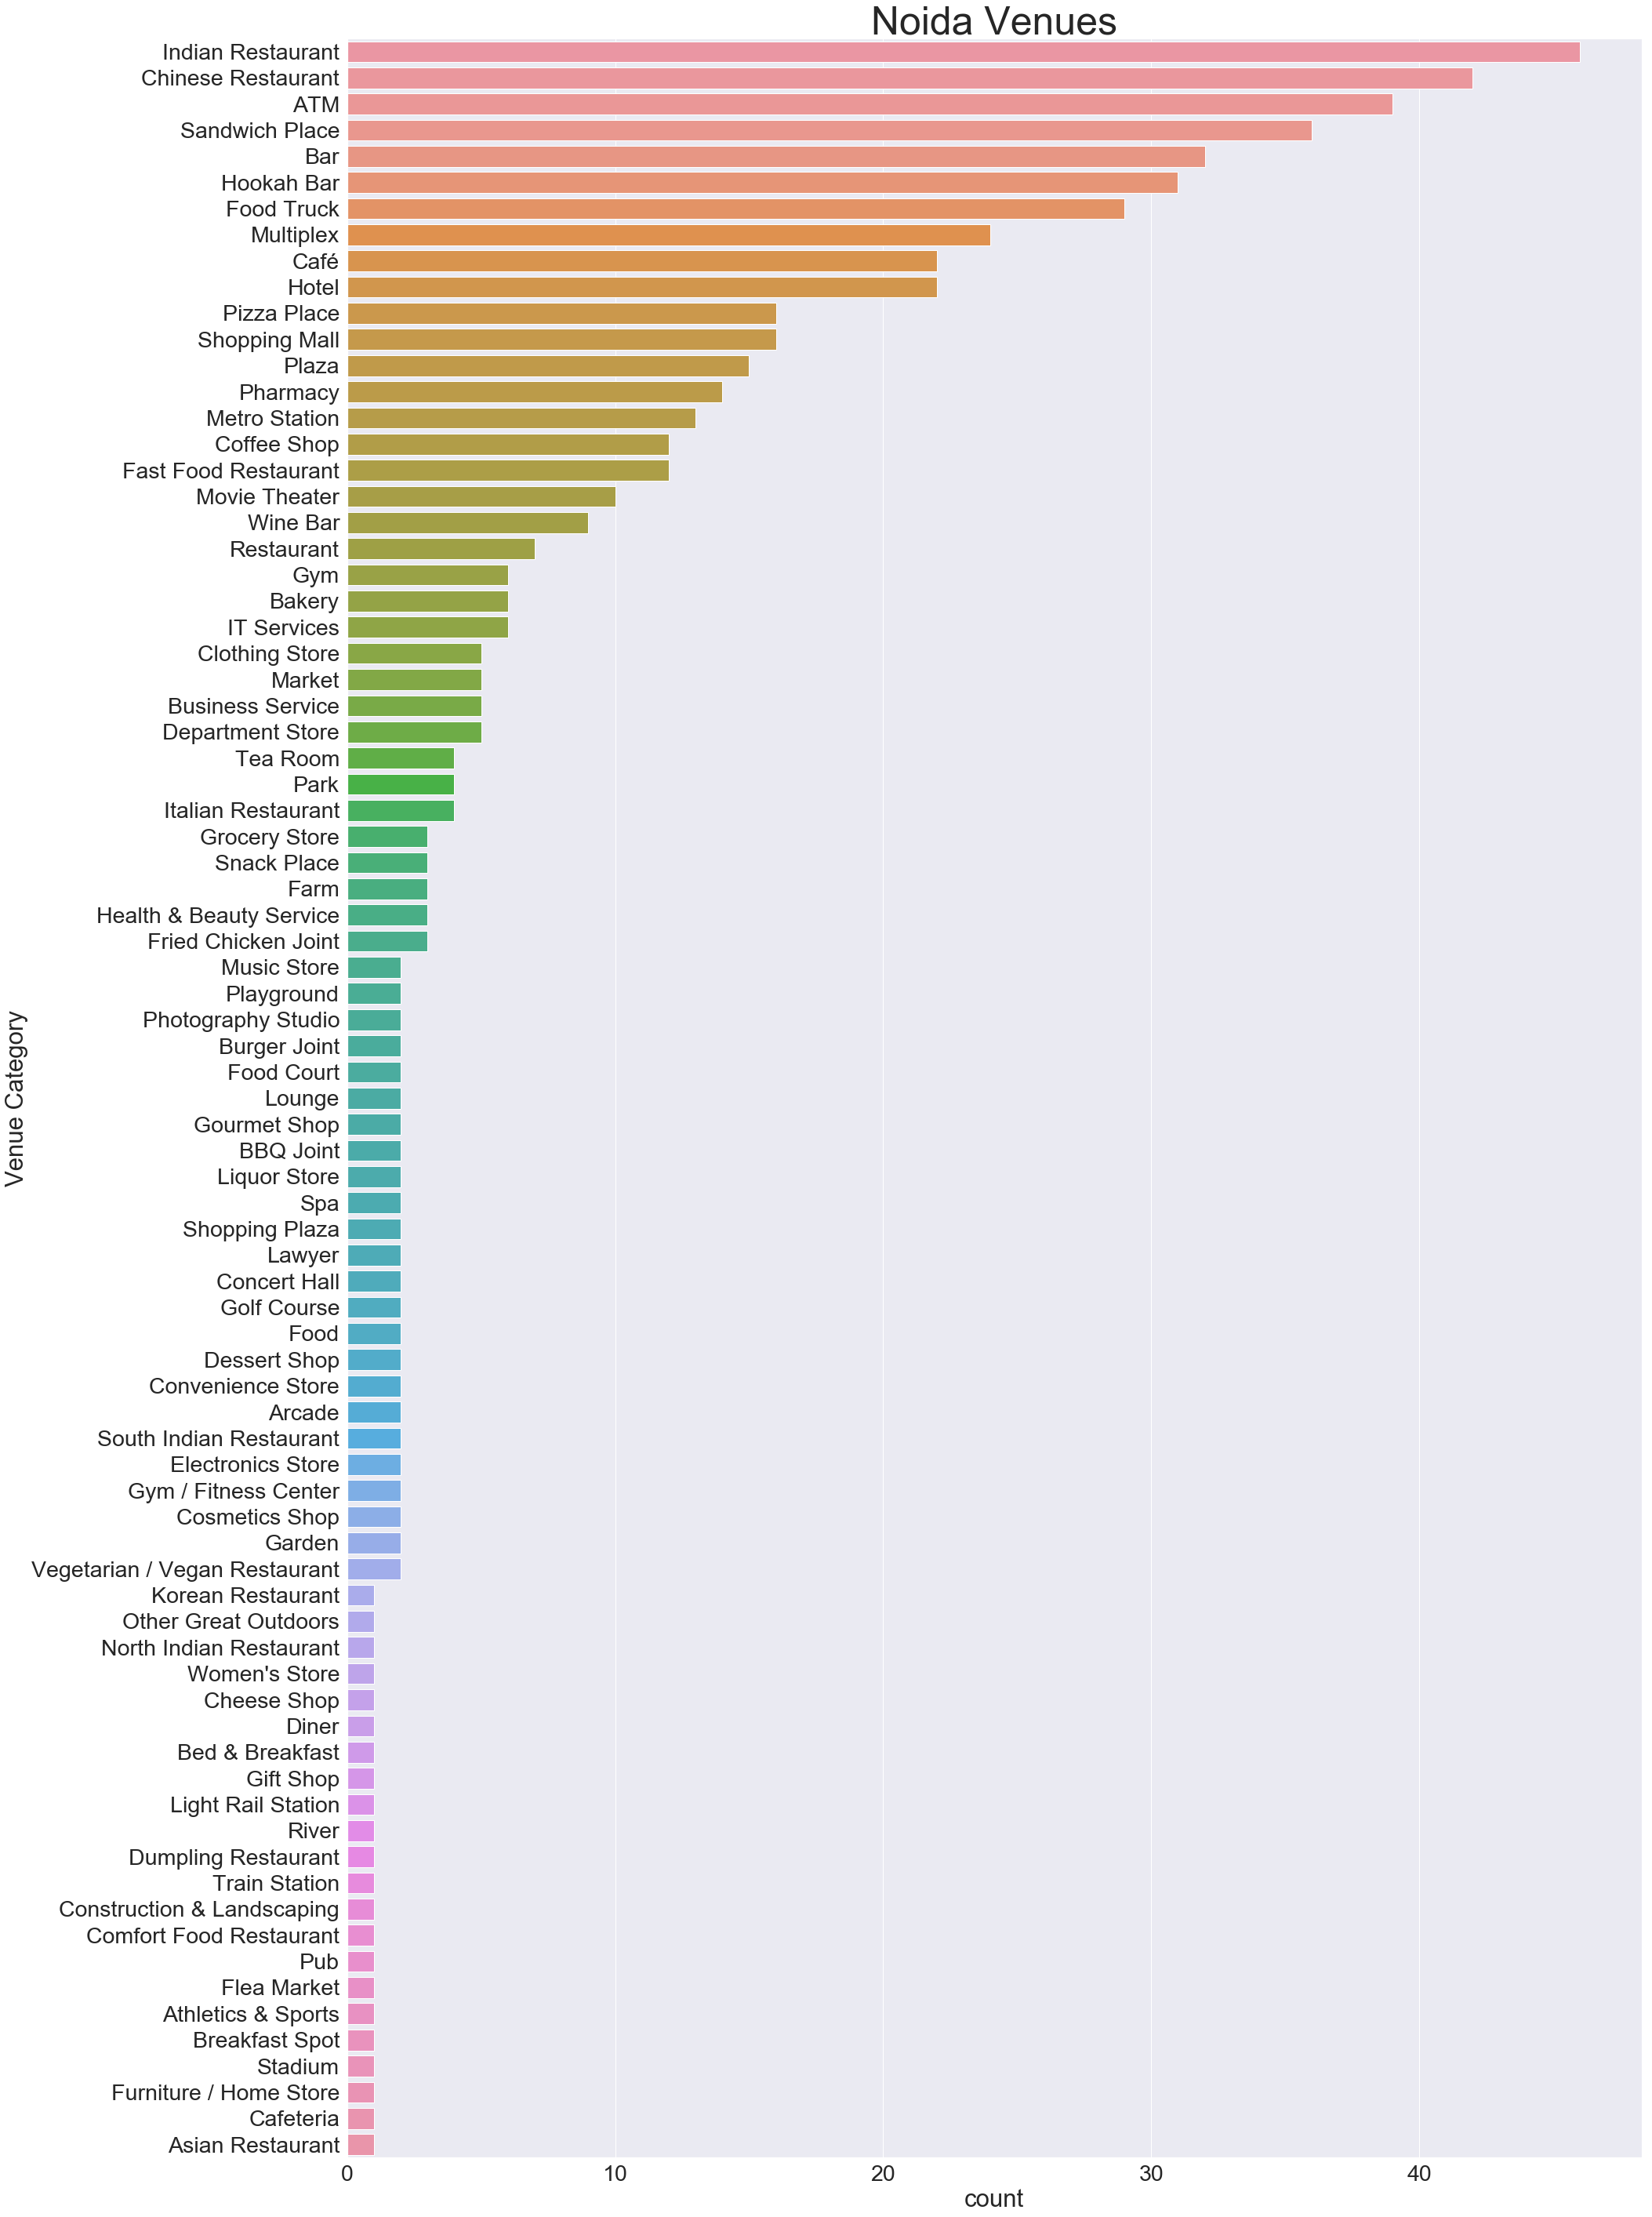

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=2.6)
#fig, ax = plt.subplots()
plt.figure(figsize=(30,40))
plt.title("Noida Venues", fontsize=50)
sns.countplot(y="Venue Category",data=noida_venues, order=noida_venues["Venue Category"].value_counts().index)
#ax.set_yticklabels(ax.get_yticklabels(), fontsize=25)
plt.tight_layout()
plt.savefig("output_noida.png")

In [174]:
noida_venues["Venue Category"].value_counts()

Indian Restaurant         46
Chinese Restaurant        42
ATM                       39
Sandwich Place            36
Bar                       32
                          ..
Breakfast Spot             1
Stadium                    1
Furniture / Home Store     1
Cafeteria                  1
Asian Restaurant           1
Name: Venue Category, Length: 81, dtype: int64

In [175]:
map_clusters.save("noida.html")

In [176]:
n1=noida_venues["Venue Category"]

In [182]:
n1.to_frame().to_csv("noida_venue_category.csv", index=False)